In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ML_data_2023-03-07.csv')

In [4]:
df

,Rok produkcji,Przebieg,Pojemność skokowa,Moc,Spalanie W Mieście,Cena,Oferta od_Firmy,Oferta od_Osoby prywatnej,Rodzaj paliwa_Benzyna,Rodzaj paliwa_Diesel,Skrzynia biegów_Automatyczna,Skrzynia biegów_Manualna,Kraj pochodzenia_Inne,Kraj pochodzenia_Niemcy,Kraj pochodzenia_Polska,Zarejestrowany w Polsce_Nie,Zarejestrowany w Polsce_Tak
0,2015,112000,1395.0,125.0,6.000000,56400,0,1,1,0,0,1,0,0,1,0,1
1,1997,230000,1781.0,75.0,11.000000,3500,0,1,1,0,0,1,1,0,0,0,1
2,2007,126296,1390.0,140.0,9.000000,19900,0,1,1,0,0,1,0,1,0,1,0
3,2007,367800,1896.0,105.0,6.000000,14000,0,1,0,1,0,1,0,1,0,0,1
4,2008,293000,1896.0,105.0,8.000000,13500,0,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1988,142961,1781.0,107.0,6.164663,49999,1,0,1,0,0,1,1,0,0,1,0
1459,2015,52109,1395.0,125.0,6.000000,66800,1,0,1,0,1,0,0,0,1,0,1
1460,2019,58000,1498.0,150.0,6.100000,85500,0,1,1,0,1,0,1,0,0,0,1
1461,2005,195670,1595.0,102.0,9.000000,17000,1,0,1,0,0,1,0,1,0,1,0


<AxesSubplot:>

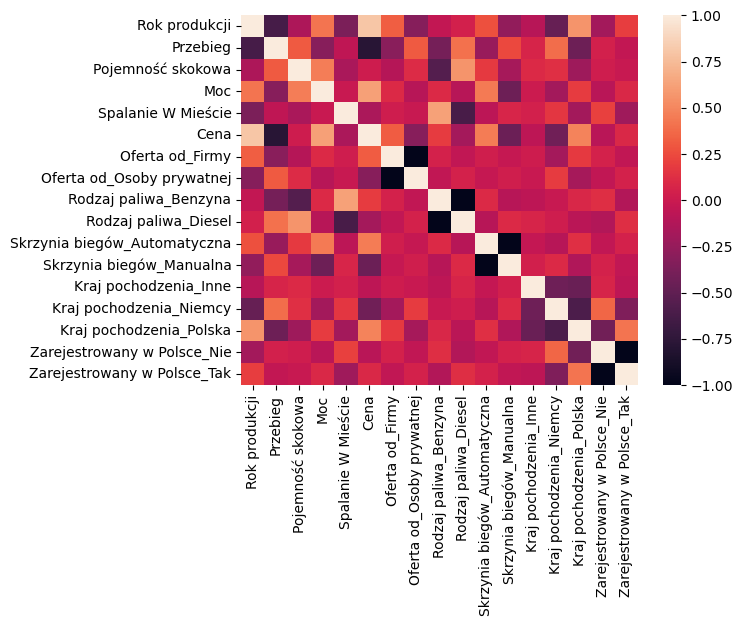

In [5]:
corr = df.corr()
sns.heatmap(corr)

<AxesSubplot:>

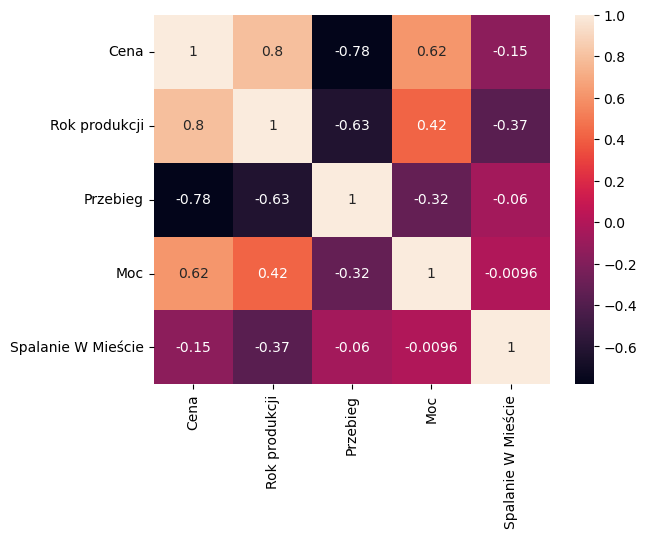

In [6]:
df_vars = df[['Cena', 'Rok produkcji', 'Przebieg', 'Moc', 'Spalanie W Mieście']].copy()
corr = df_vars.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='Rok produkcji', ylabel='Spalanie W Mieście'>

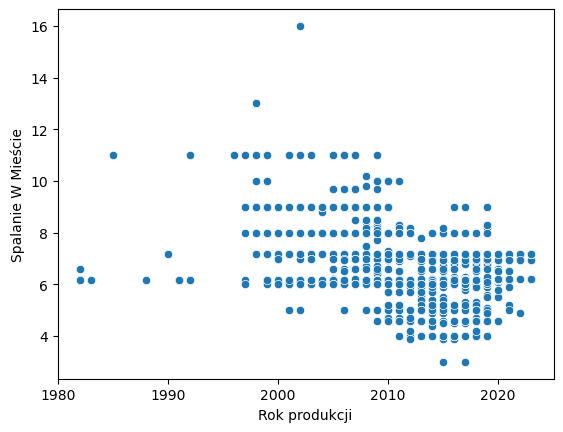

In [7]:
sns.scatterplot(data=df,x='Rok produkcji', y='Spalanie W Mieście')

<AxesSubplot:xlabel='Rok produkcji', ylabel='Przebieg'>

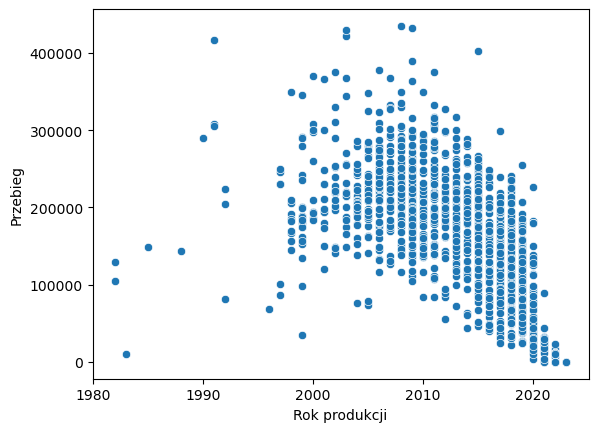

In [8]:
sns.scatterplot(data=df,x='Rok produkcji', y='Przebieg')

Checking the negative correlation between Spalanie W Mieście and Rok produkcji as well as Przebieg and Rok produkcji, Both make. Newer cars - less time to run up the mileage and more advanced technology thus the engines are more efficent.
It makes sense that those variables are quite highly correlated so we let them be.

In [9]:
df_cena = pd.DataFrame(df_vars.pop('Cena'))

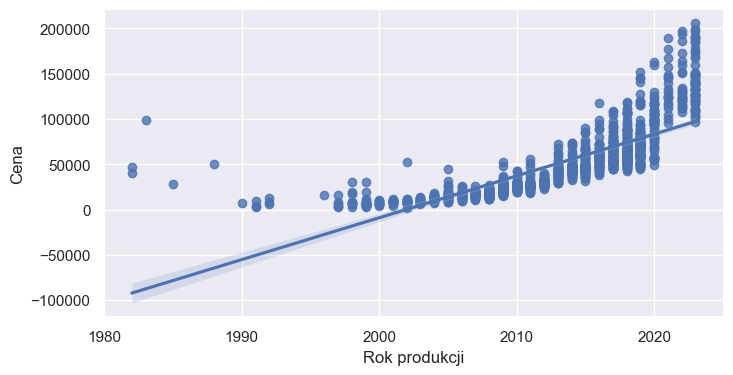

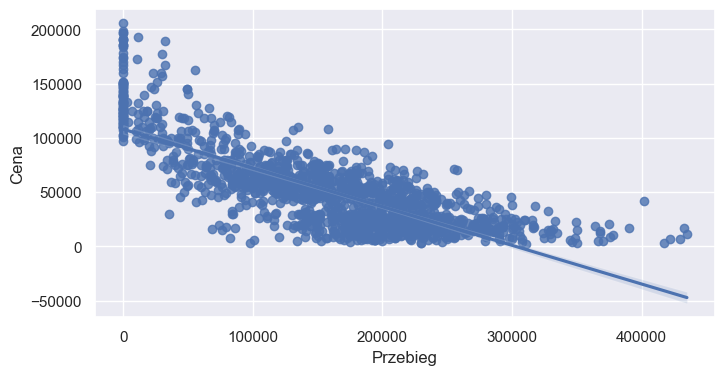

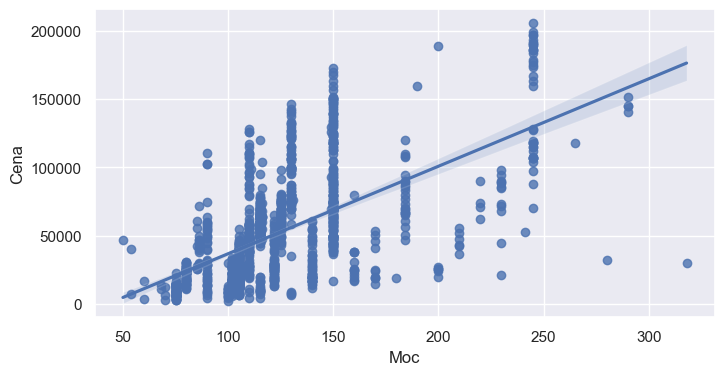

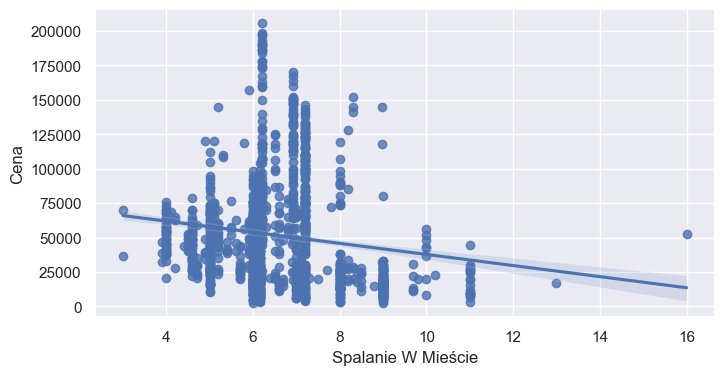

In [10]:
i = 1
for var in df_vars:
    sns.set(rc={"figure.figsize":(8, 4)})
    plt.subplots(1)
    sns.regplot(x=df_vars[[var]],y=df_cena)
    i+=1

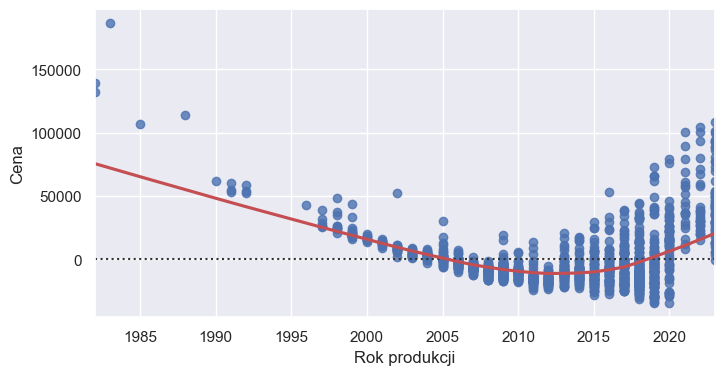

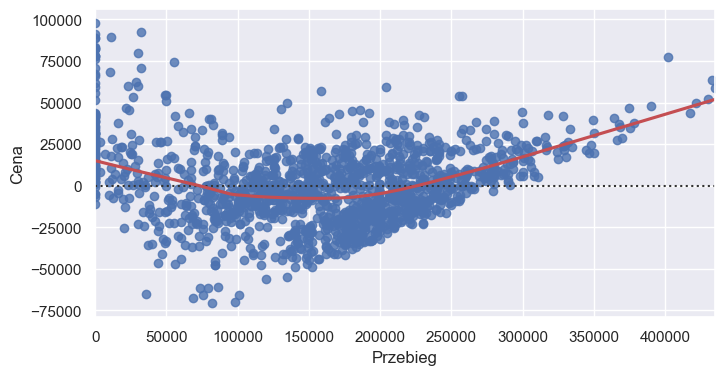

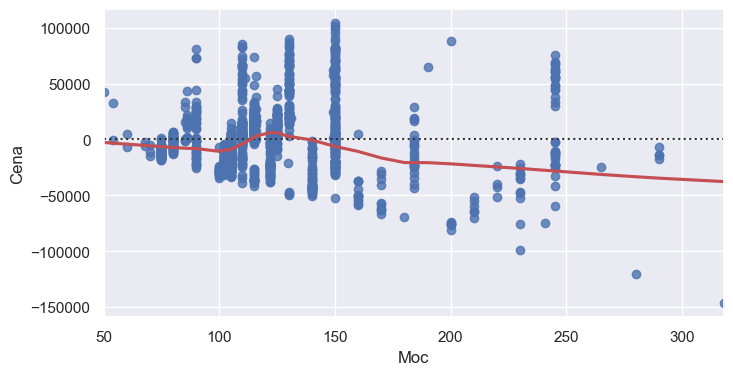

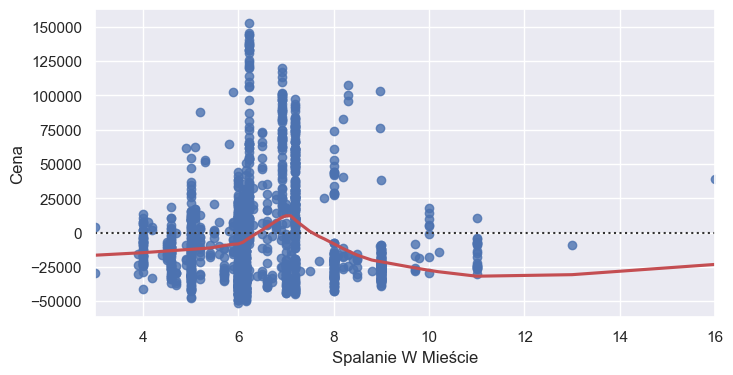

In [11]:
i = 1
for var in df_vars:
    sns.set(rc={"figure.figsize":(8, 4)})
    plt.subplots(1)
    sns.residplot(x=df_vars[[var]],y=df_cena, lowess=True, line_kws=dict(color="r"))
    i+=1

Residual plots don't look great, clearly there's heteroskedasticity. We shall try various models: linear regression, Ridge regression, lasso. Depending on the results I will also try to apply polymonial regression to the dataset.

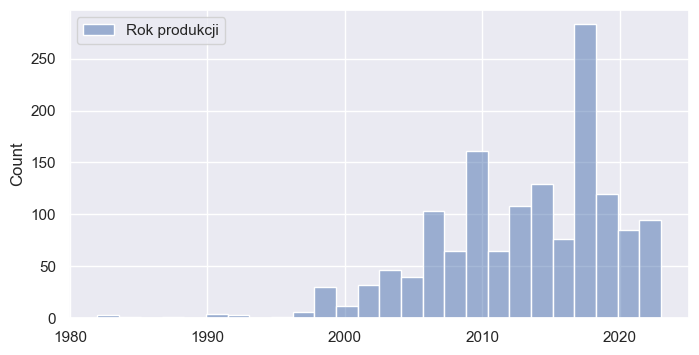

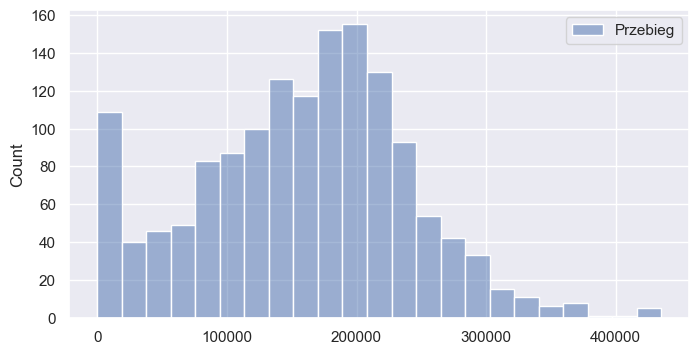

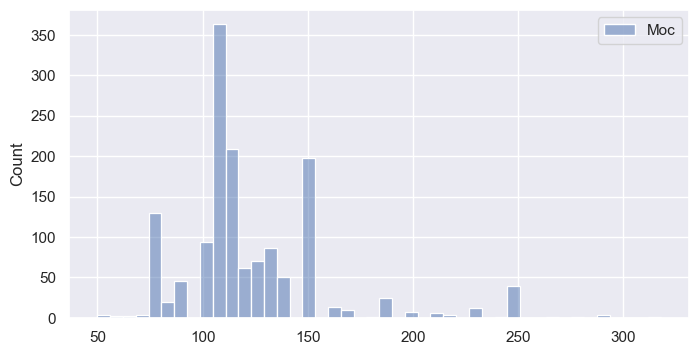

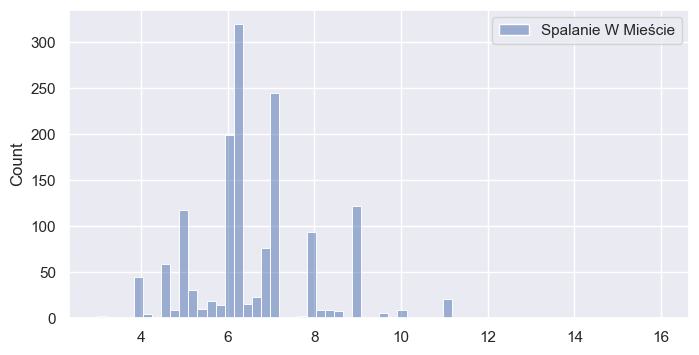

In [12]:
i = 1
for var in df_vars:
    sns.set(rc={"figure.figsize":(8, 4)})
    plt.subplots(1)
    sns.histplot(df_vars[[var]])
    i+=1

In [13]:
#checking the outlier - I manually checked the link - seems to be a tuned up version of an old model
df[df['Moc'] == df['Moc'].max()]

,Rok produkcji,Przebieg,Pojemność skokowa,Moc,Spalanie W Mieście,Cena,Oferta od_Firmy,Oferta od_Osoby prywatnej,Rodzaj paliwa_Benzyna,Rodzaj paliwa_Diesel,Skrzynia biegów_Automatyczna,Skrzynia biegów_Manualna,Kraj pochodzenia_Inne,Kraj pochodzenia_Niemcy,Kraj pochodzenia_Polska,Zarejestrowany w Polsce_Nie,Zarejestrowany w Polsce_Tak
1300,1999,35470,1781.0,318.0,11.0,29999,1,0,1,0,0,1,1,0,0,0,1
